In [ ]:
Create visualizations using Matplotib, Seaborn and Folium

In [ ]:
Installing Required Libraries

In [1]:
%pip install seaborn
%pip install folium


In [ ]:
Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

<ipython-input-2-107089beb3f3>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
Scenario
In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.
recession period 1 - year 1980
recession period 2 - year 1981 to 1982
recession period 3 - year 1991
recession period 4 - year 2000 to 2001
recession period 5 - year end 2007 to mid 2009
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)




Data Description
The dataset used for this visualization assignment contains historical_automobile_sales data representing automobile sales and related variables during recession and non-recession period.

The dataset includes the following variables:
1. Date: The date of the observation.
2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
3. Automobile_Sales: The number of vehicles sold during the period.
4. GDP: The per capita GDP value in USD.
5. Unemployment_Rate: The monthly unemployment rate.
6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
8. Price: The average vehicle price during the period.
9. Advertising_Expenditure: The advertising expenditure of the company.
10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar, Mediumfamilycar, Executivecar, Sports.
11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
12.Month: Month of the observation extracted from Date..
13.Year: Year of the observation extracted from Date.
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.

In [3]:
#Importing Data
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
import pandas as pd
df = pd.read_csv(text)
print('Data downloaded and read into a dataframe!')
df.describe()
df.columns


Data downloaded and read into a dataframe!


Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

Creating Visualizations for Data Analysis
TASK 1.1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year¶

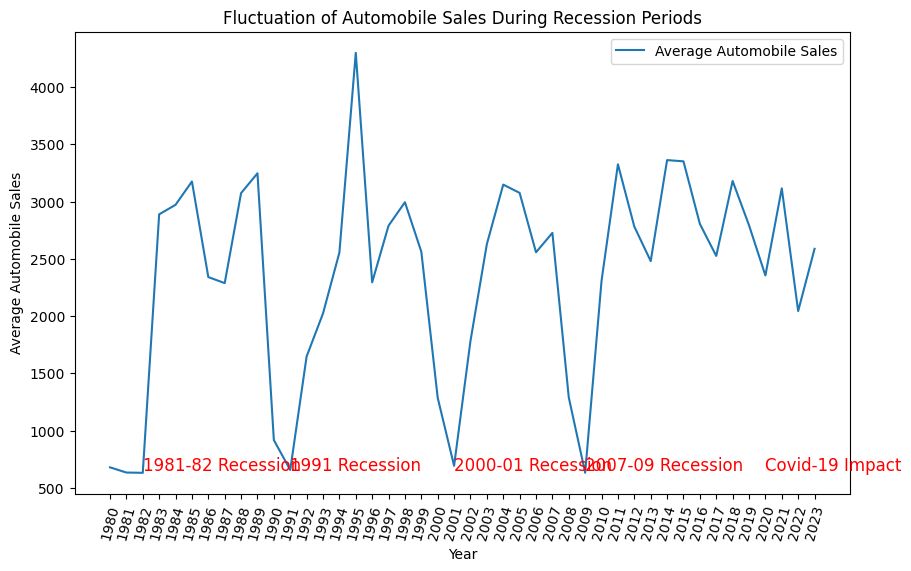

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import io
from js import fetch

# URL of the dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Fetch and read the dataset
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
df = pd.read_csv(text)

# Group data by year and calculate the average sales
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()

# Create figure
plt.figure(figsize=(10, 6))

# Plot the line chart
df_line.plot(kind='line', label='Average Automobile Sales')

# Customize the x-ticks (years) with rotation
plt.xticks(list(range(1980, 2024)), rotation=75)

# Label the axes and set the title
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Fluctuation of Automobile Sales During Recession Periods')

# Add text annotations to highlight recession periods
plt.text(1982, 650, '1981-82 Recession', fontsize=12, color='red')
plt.text(1991, 650, '1991 Recession', fontsize=12, color='red')
plt.text(2001, 650, '2000-01 Recession', fontsize=12, color='red')
plt.text(2009, 650, '2007-09 Recession', fontsize=12, color='red')
plt.text(2020, 650, 'Covid-19 Impact', fontsize=12, color='red')

# Show legend
plt.legend()

# Show the plot
plt.show()


TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

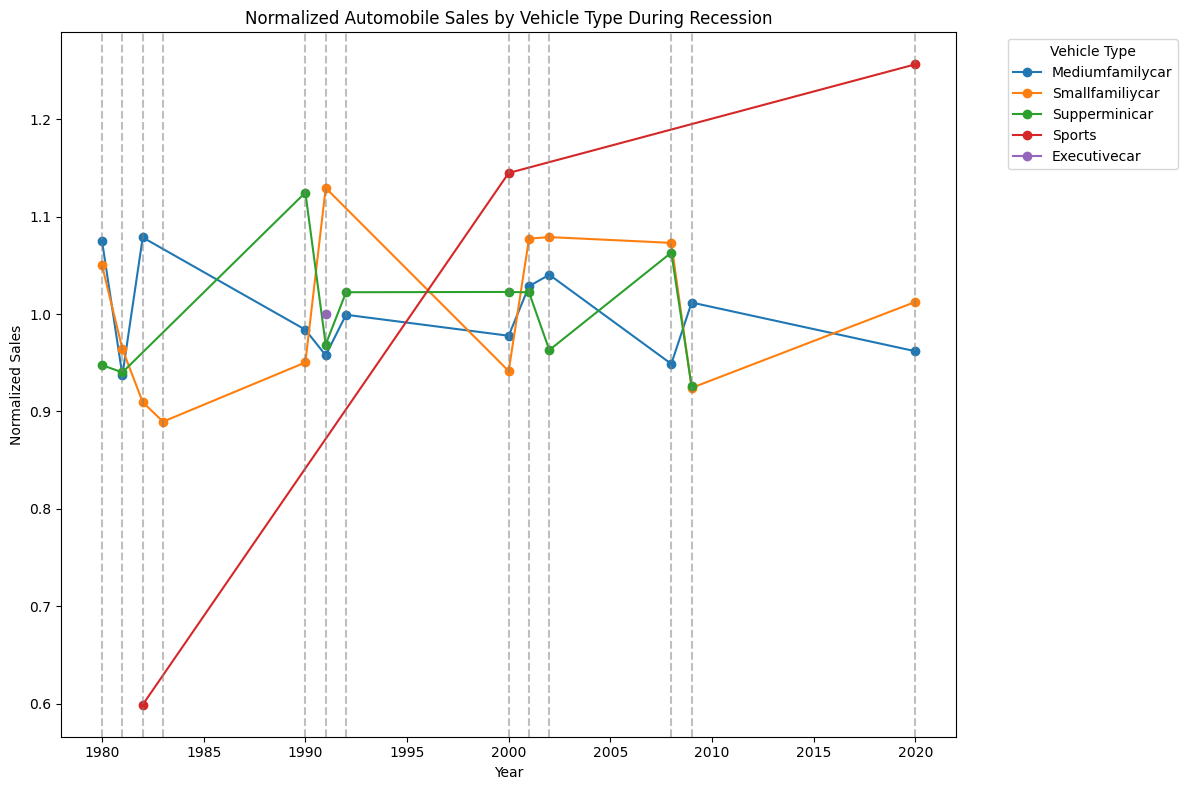

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import io
from js import fetch

# URL of the dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Fetch and read the dataset
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
df = pd.read_csv(text)

# Assuming 'Recession' column exists and filters the data for recession periods (1 indicating recession years)
df_rec = df[df['Recession'] == 1]

# Calculate the average automobile sales by year and vehicle type during the recession
df_Mline = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# Calculate the normalized sales by dividing by the average sales for each vehicle type
df_Mline['Normalized_Sales'] = df_Mline.groupby('Vehicle_Type')['Automobile_Sales'].transform(lambda x: x / x.mean())

# Set the 'Year' as the index
df_Mline.set_index('Year', inplace=True)

# Create the plot for each vehicle type
plt.figure(figsize=(12, 8))
for vehicle_type in df_Mline['Vehicle_Type'].unique():
    data = df_Mline[df_Mline['Vehicle_Type'] == vehicle_type]
    plt.plot(data.index, data['Normalized_Sales'], label=vehicle_type, marker='o')

# Highlight recession years
recession_years = df_rec['Year'].unique()
for year in recession_years:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)

# Add labels, legend, and title
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Normalized Sales")
plt.xlabel("Year")
plt.title("Normalized Automobile Sales by Vehicle Type During Recession")

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
From the above plot, what insights have you gained on the sales of various vehicle types?
Type in your answer below:


Sports cars and supermini cars exhibit resilience or even growth during recession periods. In contrast, medium family cars, and to a lesser extent, small family cars, show greater sensitivity to economic changes, with more fluctuating trends. The consistent upward trend in sports vehicle sales highlights the stability of the luxury market, even amid economic downturns.

In [ ]:
TASK 1.3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

Now you want to compare the sales of different vehicle types during a recession and a non-recession period

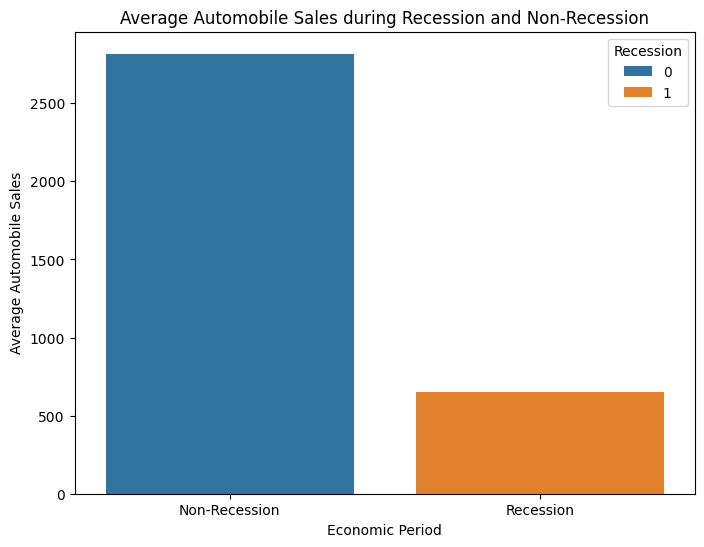

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from js import fetch

# URL of the dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Fetch and read the dataset
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
df = pd.read_csv(text)

# Group the data by 'Recession' and calculate the mean of 'Automobile_Sales'
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

# Create the bar chart using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession', data=new_df)
plt.xlabel('Economic Period')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()



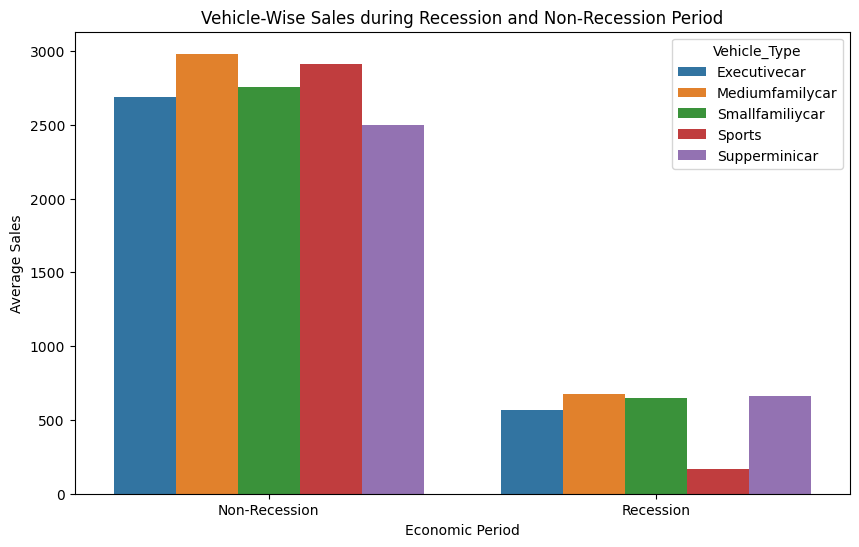

In [12]:
# Filter the data for recessionary periods and non-recession periods
recession_data = df[df['Recession'] == 1]
non_recession_data = df[df['Recession'] == 0]

# Group the data by 'Recession' and 'Vehicle_Type' to calculate the mean of 'Automobile_Sales'
dd = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Economic Period')
plt.ylabel('Average Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.show()


From the above chart what insights have you gained on the overall sales of automobiles during recession?
Type your answer below:-


From this plot, we can observe a significant decline in overall automobile sales during the recession. However, the vehicle types most affected by the recession are executive cars and sports cars.


TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

Now, you want to find more insights from the data to understand the reason.
Plot a two line charts using subplotting to answer:-

How did the GDP vary over time during recession and non-recession periods?

Make use of add_subplot() from Matplotlib for this comparision.

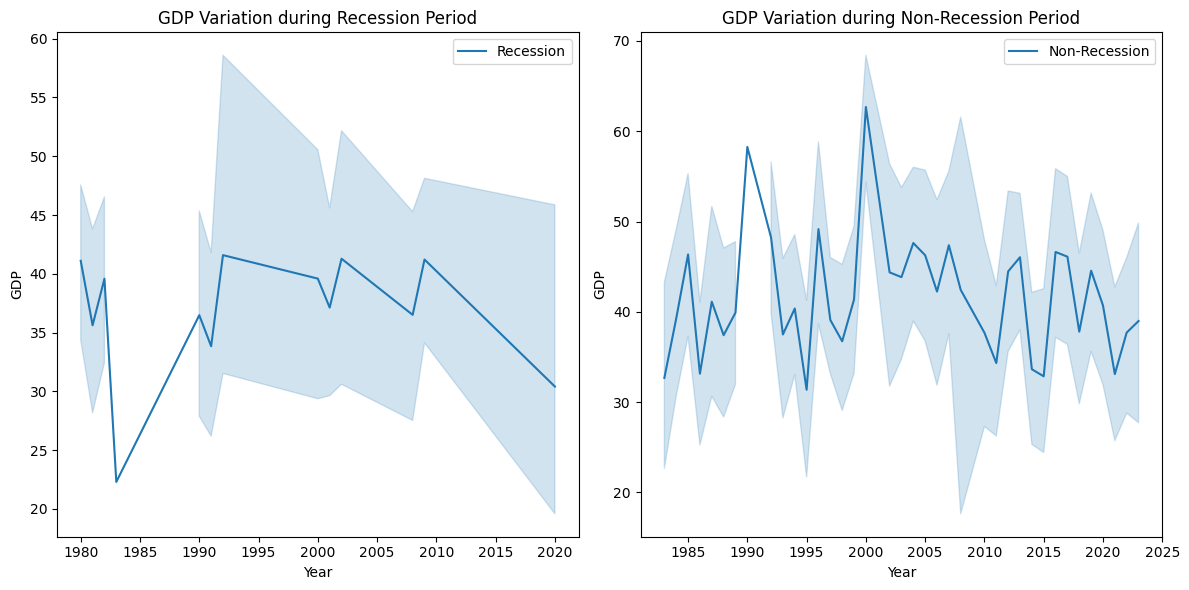

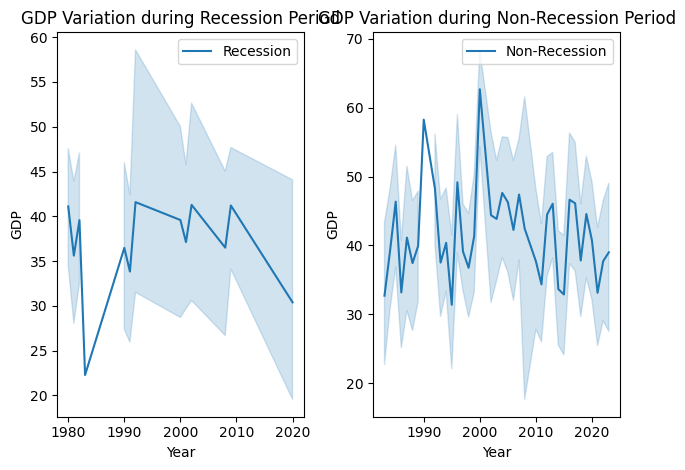

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
from js import fetch

# URL of the dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Fetch and read the dataset
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
df = pd.read_csv(text)

# Create dataframes for recession and non-recession periods
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Create figure
fig = plt.figure(figsize=(12, 6))

# Create different axes for subplotting
ax0 = fig.add_subplot(1, 2, 1)  # Add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2)  # Add subplot 2 (1 row, 2 columns, second plot)

# Plot GDP variation during recession period
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

# Plot GDP variation during non-recession period
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()

 # Subplot 1: GDP variation during recession period
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Variation during Recession Period')
plt.legend()

# Subplot 2: GDP variation during non-recession period
plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Variation during Non-Recession Period')
plt.legend()

plt.tight_layout()
plt.show()
 

TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend

Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble
Title this plot as 'Seasonality impact on Automobile Sales'

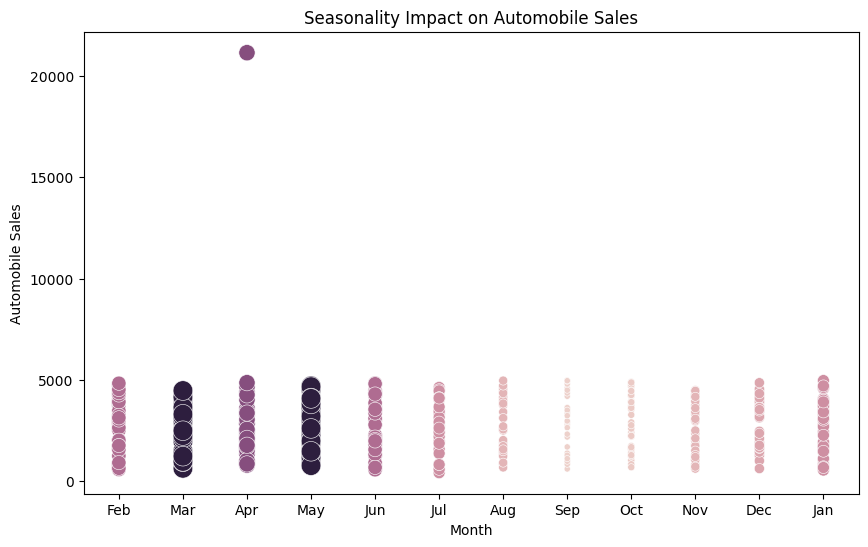

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
from js import fetch

# URL of the dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Fetch and read the dataset
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
df = pd.read_csv(text)

# Filter the data for non-recession years
non_rec_data = df[df['Recession'] == 0]

# Size parameter for the bubbles: Use 'Seasonality_Weight' for bubble size
size = non_rec_data['Seasonality_Weight']

# Create the bubble plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, hue='Seasonality_Weight', legend=False, sizes=(20, 200))

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality Impact on Automobile Sales')

# Display the plot
plt.show()


TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period?

Title this plot as 'Consumer Confidence and Automobile Sales during Recessions'

How does the average vehicle price relate to the sales volume during recessions?


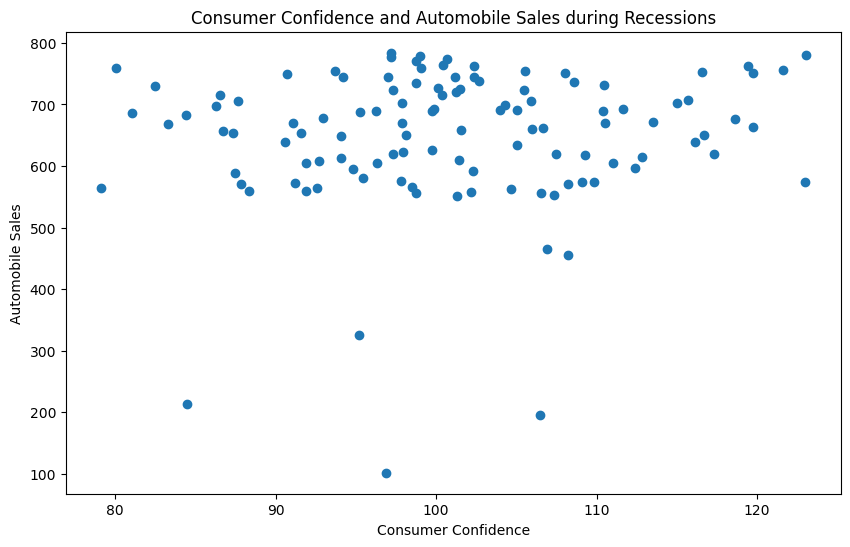

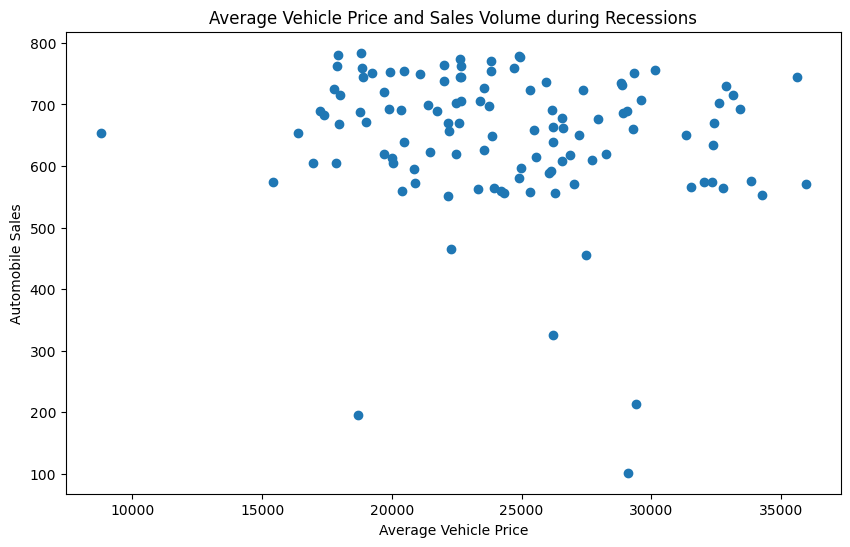

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import io
from js import fetch

# URL of the dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Fetch and read the dataset
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
df = pd.read_csv(text)

# Create a dataframe for the recession period
rec_data = df[df['Recession'] == 1]

# Scatter plot for Consumer Confidence vs Automobile Sales during Recessions
plt.figure(figsize=(10, 6))
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])

# Set labels and title
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')

# Display the plot
plt.show()
# Scatter plot for Average Vehicle Price vs Automobile Sales during Recessions
plt.figure(figsize=(10, 6))
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])

# Set labels and title
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.title('Average Vehicle Price and Sales Volume during Recessions')

# Display the plot
plt.show()


TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods?

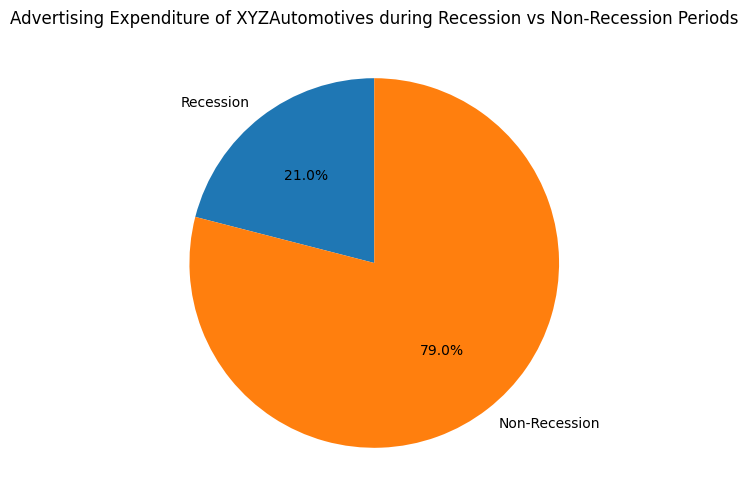

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import io
from js import fetch

# URL of the dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Fetch and read the dataset
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
df = pd.read_csv(text)

# Filter the data for recession and non-recession periods
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure
plt.figure(figsize=(8, 6))
labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Title for the chart
plt.title('Advertising Expenditure of XYZAutomotives during Recession vs Non-Recession Periods')

# Display the pie char
plt.show()

From the above plot, what insights do you find on the advertisement expenditure during recession and non recession periods?
Type your answer below:-

It appears that ABCAutomotives has been allocating a significantly higher budget for advertisements during non-recession periods compared to recession times. Makes sense!

TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.
Can we observe the share of each vehicle type in total expenditure during recessions?

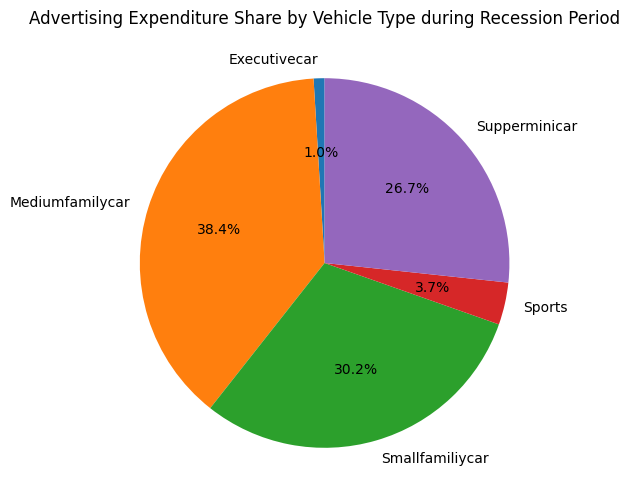

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import io
from js import fetch

# URL of the dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Fetch and read the dataset
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
df = pd.read_csv(text)

# Filter the data for recession period
Rdata = df[df['Recession'] == 1]

# Calculate the total advertising expenditure by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(8, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Title for the chart
plt.title('Advertising Expenditure Share by Vehicle Type during Recession Period')

# Display the pie chart
plt.show()


TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.

Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period

You can create a lineplot and title the plot as 'Effect of Unemployment Rate on Vehicle Type and Sales'

<ipython-input-29-761d76a2c12a>:6: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',


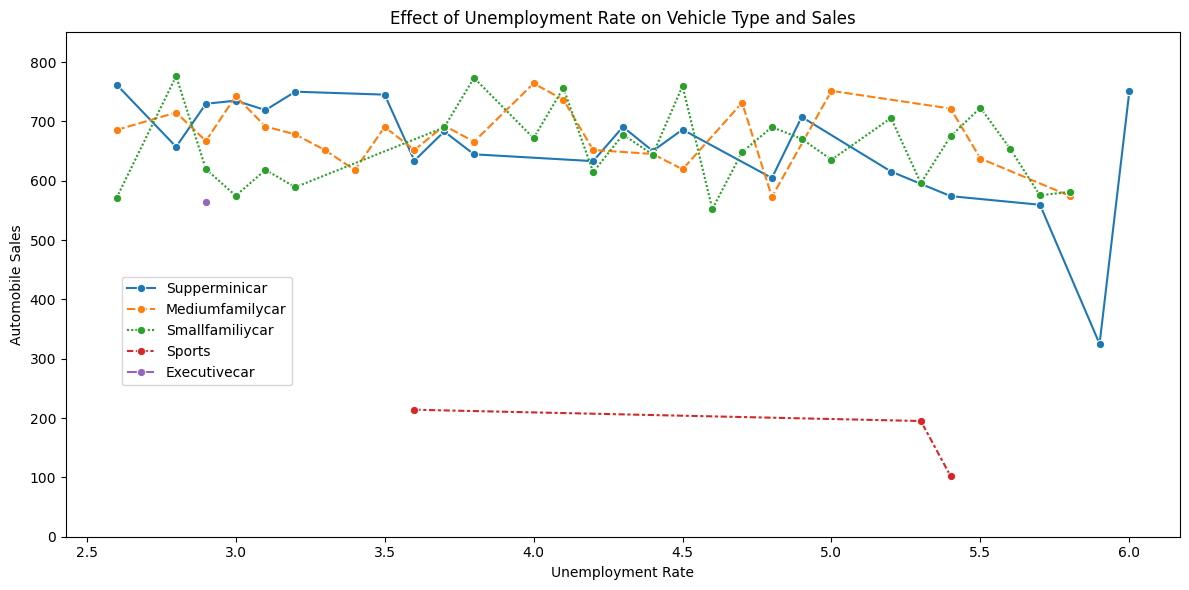

In [29]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create the lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales', 
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)

# Set y-axis limit for better visibility
plt.ylim(0, 850)

# Customize legend position
plt.legend(loc=(0.05, 0.3))

# Add labels and title
plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')

# Show the plot
plt.tight_layout()
plt.show()


